given camera angle of the task and the change of angle, create a weight distribution in shape of a cone and shift the weight distribution as camera/sub angle changes

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import copy

In [70]:
class particleFilter():
    particleMat = []
    def __init__(self, angleAmount):
        ''' 
        angleAmount is the number of angle we want in particleMat. 
        coordinate: say we use polar with 0 in Cartesian positve x direction. It goes [0,len(angleAmount)), 
        which we will output by mapping this to [0,360), or whatever the sub takes
        '''
        self.particles = angleAmount
        self.particleMat = [ 0 for i in range(self.particles) ]
    
    def updateData():
        '''
        will clean up data. 
        '''
    
    def updateAngle(self,angle,stdev):
        '''
        data will be the input data in angles, most likely one single input and error in angle. 
        angle might need adjustment to fit our coordinates.
        error might need treatment to become standard deviation
        '''
        '''
        increase prob for "angle", bc we see angle.
        '''
        fWeight = 0.4
        
        for i in range(len(self.particleMat)):
            '''
            weight
            '''
            angleDiff = min([math.fabs(i - angle),math.fabs(angle+360-i)])
            gaussDelta =  math.e**( -1 * angleDiff*angleDiff / (2* stdev**2) )
            self.particleMat[i] = fWeight*gaussDelta+ (1-fWeight)*self.particleMat[i]
        '''
        normalize
        '''
        total = 360/sum(self.particleMat)
        self.particleMat = [i*total for i in self.particleMat]
        print(sum(self.particleMat))
        '''
        update
        '''
    def updateCameraAngle(self,cameraChange):
        newAng = [0 for i in range(len(self.particleMat))]
        for i in range(len(self.particleMat)):
            if i-cameraChange>=0:
                newAng[i-cameraChange]=self.particleMat[i]
            else:
                newAng[i-cameraChange+360]=self.particleMat[i]
        self.particleMat = newAng
    
    def updateCameraDistance(self,cameraDistance):
        newAng = [0 for i in range(len(self.particleMat))]
        for i in range(len(self.particleMat)):
            if i-cameraChange>=0:
                newAng[i-cameraChange]=self.particleMat[i]
            else:
                newAng[i-cameraChange+360]=self.particleMat[i]
        self.particleMat = newAng
        
    def getPredictedState(self):
        
    

359.9999999999997
359.9999999999996
360.0000000000003
360.00000000000017
360.00000000000034
359.9999999999998
359.9999999999997
359.99999999999966
359.99999999999926
359.99999999999994
359.99999999999966


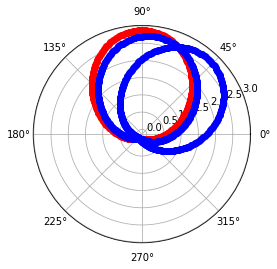

In [74]:
particle = particleFilter(360)
a=particle.updateAngle(90,50)
for i in range(359):
    plt.polar(i/180*math.pi, particle.particleMat[i],"ro")
a=particle.updateAngle(45,50)
for i in range(359):
    plt.polar(i/180*math.pi, particle.particleMat[i],"bo")
for i in range(9):
    a=particle.updateAngle(45,50)
for i in range(359):
    plt.polar(i/180*math.pi, particle.particleMat[i],"bo")